In [66]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
from astropy.coordinates import SkyCoord
import astropy.units as u
import lsst.daf.persistence as dafPersist
import lsst.afw.display as afwDisplay
import lsst.afw.fits as afwFits
import seaborn as sns

In [67]:
sns.set_context('talk')

In [2]:
#REPO = '/project/ebellm/fakes/output_ci_fakes'
REPO = '/project/morriscb/fakesOutput'


In [3]:
connection = sqlite3.connect(f'{REPO}/output/rerun/testFakes/fakesAssociation.db')

In [4]:
pd.read_sql_query('select count(diaSourceId) from DiaSource;', connection)


,count(diaSourceId)
0,1085937


In [5]:
diaSources = pd.read_sql_query('select * from DiaSource', connection)

In [6]:
diaSources

,diaSourceId,ccdVisitId,diaObjectId,ssObjectId,parentDiaSourceId,prv_procOrder,ssObjectReassocTime,midPointTai,ra,raErr,...,ixxPSF,iyyPSF,ixyPSF,extendedness,spuriousness,flags,pixelId,filterName,filterId,isDipole
0,176486747427832050,41091523,176486747427832050,0,0,0,None,57070.141866,150.439636,None,...,3.555093,3.257853,-0.344283,None,None,41946108,0,g,1,1
1,176486747427832051,41091523,176486747427832051,0,0,0,None,57070.141866,150.440402,None,...,3.555093,3.257853,-0.344283,None,None,42076288,0,g,1,1
2,176486747427832052,41091523,176486747427832052,0,0,0,None,57070.141866,150.445820,None,...,3.555093,3.257853,-0.344283,None,None,25166152,0,g,1,0
3,176486747427832053,41091523,176486747427832053,0,0,0,None,57070.141866,150.451524,None,...,3.555093,3.257853,-0.344283,None,None,25165824,0,g,1,1
4,176486747427832054,41091523,176486747427832054,0,0,0,None,57070.141866,150.453738,None,...,3.555093,3.257853,-0.344283,None,None,25165824,0,g,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085932,181078630107972863,42160654,176704635413727496,0,0,0,None,57095.193229,155.931807,None,...,1.987233,1.846000,0.103909,None,None,25299404,0,g,1,0
1085933,181078630107972864,42160654,176539279172829999,0,0,0,None,57095.193229,155.931705,None,...,1.987233,1.846000,0.103909,None,None,25299404,0,g,1,0
1085934,181078630107972865,42160654,176539279172830002,0,0,0,None,57095.193229,155.931923,None,...,1.987233,1.846000,0.103909,None,None,42076620,0,g,1,0
1085935,181078630107972866,42160654,181078630107972866,0,0,0,None,57095.193229,155.931995,None,...,1.987233,1.846000,0.103909,None,None,25299404,0,g,1,0


In [7]:
diaSources.columns

Index(['diaSourceId', 'ccdVisitId', 'diaObjectId', 'ssObjectId',
       'parentDiaSourceId', 'prv_procOrder', 'ssObjectReassocTime',
       'midPointTai', 'ra', 'raErr',
       ...
       'ixxPSF', 'iyyPSF', 'ixyPSF', 'extendedness', 'spuriousness', 'flags',
       'pixelId', 'filterName', 'filterId', 'isDipole'],
      dtype='object', length=111)

In [8]:
insertedFakes = pd.read_parquet(f'{REPO}/insertCounts.parquet')

In [9]:
insertedFakes

,raJ2000,decJ2000,DiskHalfLightRadius,BulgeHalfLightRadius,gmagVar,disk_n,bulge_n,a_d,a_b,b_d,b_b,pa_disk,pa_bluge,sourceType,where_inserted,visit,ccd,coaddMag
4162,2.624879,0.055069,1.0,1.0,22.611099,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star,calexp,412704,3,NaN
6103,2.627635,0.054742,1.0,1.0,22.921656,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star,calexp,412704,3,NaN
7936,2.627524,0.053185,1.0,1.0,21.698312,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star,calexp,412704,3,NaN
11731,2.625091,0.053628,1.0,1.0,20.576171,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star,calexp,412704,3,NaN
34125,2.627470,0.054772,1.0,1.0,22.643880,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star,calexp,412704,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85042,2.717449,-0.101517,1.0,1.0,21.353302,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star,coadd,415330,62,NaN
85828,2.720746,-0.101845,1.0,1.0,19.667643,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star,coadd,415330,62,NaN
94570,2.717839,-0.100848,1.0,1.0,20.511541,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star,coadd,415330,62,NaN
101777,2.721381,-0.103164,1.0,1.0,21.274001,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star,coadd,415330,62,NaN


In [10]:
assert(len(insertedFakes) == len(insertedFakes.drop_duplicates()))

In [12]:
insertedFakes.loc[:,'ra'] = np.degrees(insertedFakes['raJ2000'])
insertedFakes.loc[:,'decl'] = np.degrees(insertedFakes['decJ2000'])

In [13]:
insertedFakes.columns.tolist()

['raJ2000',
 'decJ2000',
 'DiskHalfLightRadius',
 'BulgeHalfLightRadius',
 'gmagVar',
 'disk_n',
 'bulge_n',
 'a_d',
 'a_b',
 'b_d',
 'b_b',
 'pa_disk',
 'pa_bluge',
 'sourceType',
 'where_inserted',
 'visit',
 'ccd',
 'coaddMag',
 'ra',
 'decl']

In [14]:
#scFake = SkyCoord(insertedFakes.raJ2000,insertedFakes.decJ2000,unit=u.radian)
scFake = SkyCoord(insertedFakes.ra,insertedFakes.decl,unit=u.degree)
scDiaSource = SkyCoord(diaSources.ra,diaSources.decl,unit=u.degree)

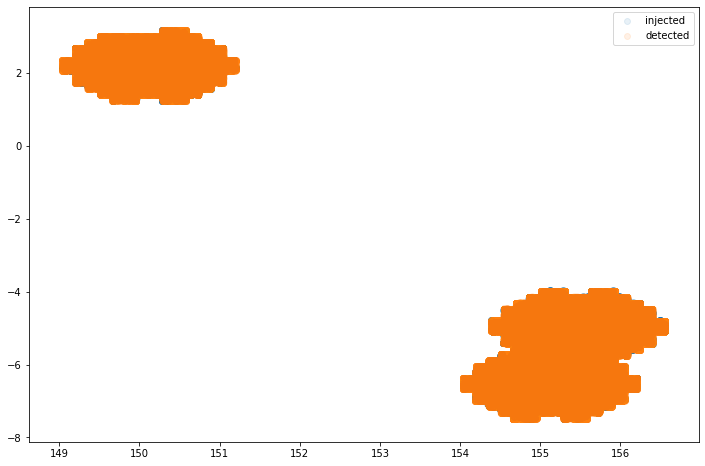

In [16]:
plt.figure(figsize=(12,8))
plt.scatter(insertedFakes.ra,insertedFakes.decl,label='injected',alpha=0.1)
plt.scatter(diaSources.ra,diaSources.decl,label='detected',alpha=0.1)
plt.legend()

In [17]:
idx, d2d, d3d = scFake.match_to_catalog_sky(scDiaSource)

In [18]:
wMatches = d2d < 1*u.arcsec

In [19]:
np.nonzero(wMatches)[0]

array([     0,      1,      2, ..., 236354, 236355, 236356])

In [26]:
fakesWithDiaObjects = insertedFakes.iloc[np.nonzero(wMatches)[0]]
fakesWithoutDiaObjects = insertedFakes.iloc[np.nonzero(~wMatches)[0]]
fakeMatchedDiaObjects = diaSources.iloc[idx[wMatches]]

In [27]:
assert(len(fakesWithDiaObjects)+len(fakesWithoutDiaObjects) == len(insertedFakes))

In [21]:
fakesWithDiaObjects

,raJ2000,decJ2000,DiskHalfLightRadius,BulgeHalfLightRadius,gmagVar,disk_n,bulge_n,a_d,a_b,b_d,b_b,pa_disk,pa_bluge,sourceType,where_inserted,visit,ccd,coaddMag,ra,decl
4162,2.624879,0.055069,1.0,1.0,22.611099,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star,calexp,412704,3,NaN,150.394495,3.155246
6103,2.627635,0.054742,1.0,1.0,22.921656,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star,calexp,412704,3,NaN,150.552407,3.136460
7936,2.627524,0.053185,1.0,1.0,21.698312,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star,calexp,412704,3,NaN,150.546030,3.047296
11731,2.625091,0.053628,1.0,1.0,20.576171,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star,calexp,412704,3,NaN,150.406623,3.072636
34125,2.627470,0.054772,1.0,1.0,22.643880,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star,calexp,412704,3,NaN,150.542928,3.138218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85042,2.717449,-0.101517,1.0,1.0,21.353302,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star,coadd,415330,62,NaN,155.698336,-5.816491
85828,2.720746,-0.101845,1.0,1.0,19.667643,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star,coadd,415330,62,NaN,155.887278,-5.835308
94570,2.717839,-0.100848,1.0,1.0,20.511541,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star,coadd,415330,62,NaN,155.720680,-5.778157
101777,2.721381,-0.103164,1.0,1.0,21.274001,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star,coadd,415330,62,NaN,155.923661,-5.910869


In [23]:
len(fakesWithDiaObjects)

148511

In [24]:
len(insertedFakes)

236357

In [78]:
diaSources['snr'] = diaSources['apFlux']/diaSources['apFluxErr']

In [ ]:
plt.scatter()

In [61]:
wCalexpMatchedFakes = fakesWithDiaObjects['where_inserted'] == 'calexp'
wCalexpUnmatchedFakes = fakesWithoutDiaObjects['where_inserted'] == 'calexp'
#wCalexpMatchedFakes = fakesWithDiaObjects['where_inserted'] == 'coadd'
#wCalexpUnmatchedFakes = fakesWithoutDiaObjects['where_inserted'] == 'coadd'

In [72]:
bins = np.linspace(19,24,50)
n_matched, edges = np.histogram(fakesWithDiaObjects.loc[wCalexpMatchedFakes,'gmagVar'],bins=bins)
nmatched_err = np.sqrt(n_matched)
n_unmatched, edges = np.histogram(fakesWithoutDiaObjects.loc[wCalexpUnmatchedFakes,'gmagVar'],bins=bins)
ntot = n_matched + n_unmatched
ntot_err = np.sqrt(ntot) # compute on total to keep Poisson errors in gaussian regime
completeness = n_matched/ntot
completeness_err = completeness * np.sqrt((nmatched_err/n_matched)**2. + (ntot_err/ntot)**2.)

In [71]:
n_unmatched

array([ 45,   5,  29,  51,  73,  26,  34,  33,  45,  98,  68,  45,  47,
        28,  99,   4,  18,  69,  50,  36,  45,  30,  30, 146,   0,  98,
        14,  28,   2,  16,  30,  22, 135,  74,  59,  54,  23,  87,  28,
        40,  33,  67,  74, 128,  47, 210, 180, 345, 133])

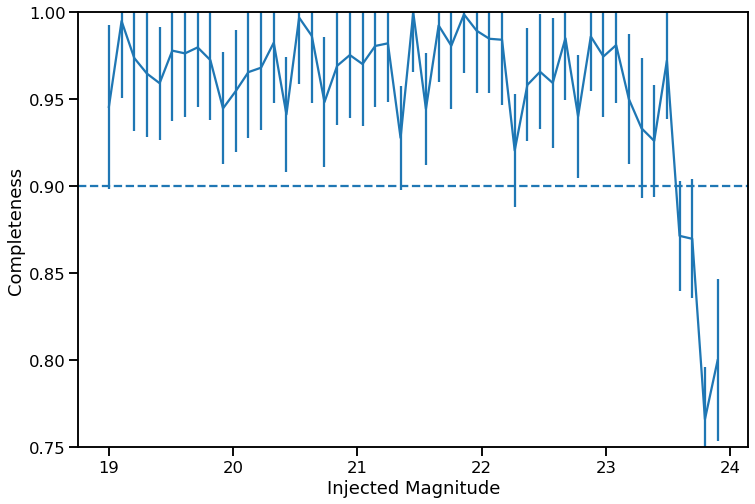

In [75]:
plt.figure(figsize=(12,8))
#plt.plot(bins[0:-1],completeness)
plt.errorbar(bins[0:-1],completeness, completeness_err)

plt.axhline(.9,ls='--')
plt.xlabel('Injected Magnitude')
plt.ylabel('Completeness')
plt.ylim(0.75,1.)
plt.savefig('fig/completeness_calexp_fakes.png',bbox_inches='tight')

In [31]:
help(np.histogram)

Help on function histogram in module numpy:

histogram(a, bins=10, range=None, normed=None, weights=None, density=None)
    Compute the histogram of a set of data.
    
    Parameters
    ----------
    a : array_like
        Input data. The histogram is computed over the flattened array.
    bins : int or sequence of scalars or str, optional
        If `bins` is an int, it defines the number of equal-width
        bins in the given range (10, by default). If `bins` is a
        sequence, it defines a monotonically increasing array of bin edges,
        including the rightmost edge, allowing for non-uniform bin widths.
    
        .. versionadded:: 1.11.0
    
        If `bins` is a string, it defines the method used to calculate the
        optimal bin width, as defined by `histogram_bin_edges`.
    
    range : (float, float), optional
        The lower and upper range of the bins.  If not provided, range
        is simply ``(a.min(), a.max())``.  Values outside the range are
      